In [42]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Predictive Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Visualizations
from sklearn.tree import plot_tree
%matplotlib inline

In [2]:
df_agri = pd.read_csv("datasets/climate_change_impact_on_agriculture_2024.csv")

In [3]:
df_agri.head()

,Year,Country,Region,Crop_Type,Avg Temperature (°C),Precipitation (mm),CO2 Emissions (MT),Crop Yield (Metric Tonne/HA),Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [4]:
df_price = pd.read_csv("datasets/Prices_E_All_Data_(Normalized).csv", encoding='latin-1')

In [5]:
df_price.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),1993,1993,7021,Annual value,LCU,46000.0,A
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),1994,1994,7021,Annual value,LCU,50000.0,A
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),1995,1995,7021,Annual value,LCU,62000.0,A
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),1996,1996,7021,Annual value,LCU,50000.0,A
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),1997,1997,7021,Annual value,LCU,41000.0,A


In [6]:
# rename country columns appropriately

df_price['Area'] = df_price['Area'].replace('United States of America', 'USA')
df_price['Area'] = df_price['Area'].replace('China, mainland', 'China')
df_price['Area'] = df_price['Area'].replace('Russian Federation', 'Russia')

In [7]:
unique_countries = df_agri['Country'].unique().tolist()
print("Unique Countries:", unique_countries)

Unique Countries: ['India', 'China', 'France', 'Canada', 'USA', 'Argentina', 'Australia', 'Nigeria', 'Russia', 'Brazil']


In [8]:
df_price_renamed = df_price.rename(columns={'Area': 'Country'})
df_price_renamed = df_price_renamed.rename(columns={'Item': 'Crop_Type'})
df_price_filtered = df_price_renamed[df_price_renamed['Country'].isin(unique_countries)]


In [9]:
df_price_filtered.head()

,Area Code,Area Code (M49),Country,Item Code,Item Code (CPC),Crop_Type,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
26466,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),1991,1991,7021,Annual value,NaN,6.49,I
26467,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),1992,1992,7021,Annual value,NaN,6.51,I
26468,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),1993,1993,7021,Annual value,NaN,8.59,I
26469,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),1994,1994,7021,Annual value,NaN,8.86,I
26470,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),1995,1995,7021,Annual value,NaN,8.51,I


In [10]:
df_price_filtered.dropna(inplace=True)

/var/folders/kq/03btxrjj09n_zt0stcmh8v200000gn/T/ipykernel_3445/2538789622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_filtered.dropna(inplace=True)


In [11]:
unique_crops = df_price_filtered['Crop_Type'].unique().tolist()
print("Unique Crops:", unique_crops)

Unique Crops: ['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw', 'Apples', 'Apricots', 'Artichokes', 'Asparagus', 'Avocados', 'Bananas', 'Bananas cavendish', 'Barley', 'Beans, dry', 'Beeswax', 'Canary seed', 'Cantaloupes and other melons', 'Carrots and turnips', 'Cassava, fresh', 'Cherries', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 'Cotton lint, ginned', 'Figs', 'Grapes', 'Green garlic', 'Groundnuts, excluding shelled', 'Hen eggs in shell, fresh', 'Horse meat, fresh or chilled', 'Horse meat, fresh or chilled (biological)', 'Lemons and limes', 'Lentils, dry', 'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens', 'Maté leaves', 'Meat of cattle with the bone, fresh or chilled', 'Meat of cattle with the bone, fresh or chilled (biological)', 'Meat of chickens, fresh or chilled', 'Meat of chickens, fresh or chilled (biological)', 'Meat of goat, fresh or chilled (biological)', 'Meat of pig with the bone, fresh or chilled (biological)',

In [12]:
unique_crops_agri = df_agri['Crop_Type'].unique().tolist()
print("Unique Crops:", unique_crops_agri)

Unique Crops: ['Corn', 'Wheat', 'Coffee', 'Sugarcane', 'Fruits', 'Rice', 'Barley', 'Vegetables', 'Soybeans', 'Cotton']


In [13]:
for crop in unique_crops:
  if crop in unique_crops_agri:
    print(crop)

Barley
Rice
Wheat


In [14]:
df_price_filtered['Country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France',
       'India', 'Nigeria', 'Russia', 'USA'], dtype=object)

In [15]:
df_merged = pd.merge(df_agri, df_price_filtered, on=['Country', 'Year', 'Crop_Type'], how='inner')

In [16]:
df_merged.head()

,Year,Country,Region,Crop_Type,Avg Temperature (°C),Precipitation (mm),CO2 Emissions (MT),Crop Yield (Metric Tonne/HA),Extreme_Weather_Events,Irrigation_Access_%,...,Item Code,Item Code (CPC),Element Code,Element,Year Code,Months Code,Months,Unit,Value,Flag
0,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,...,15,'0111,5530,Producer Price (LCU/tonne),2001,7021,Annual value,LCU,709.0,A
1,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,...,15,'0111,5531,Producer Price (SLC/tonne),2001,7021,Annual value,SLC,108.1,A
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,...,15,'0111,5532,Producer Price (USD/tonne),2001,7021,Annual value,USD,96.7,A
3,2001,France,Provence-Alpes-Cote d’Azur,Wheat,11.26,2900.65,17.69,1.656,1,55.45,...,15,'0111,5530,Producer Price (LCU/tonne),2001,7021,Annual value,LCU,709.0,A
4,2001,France,Provence-Alpes-Cote d’Azur,Wheat,11.26,2900.65,17.69,1.656,1,55.45,...,15,'0111,5531,Producer Price (SLC/tonne),2001,7021,Annual value,SLC,108.1,A


In [17]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11377.0,2010.022502,8.865667,1991.00,2003.00,2012.000,2017.00,2022.00
Avg Temperature (°C),11377.0,14.899318,11.377315,-4.98,5.44,14.160,24.86,34.99
Precipitation (mm),11377.0,1610.158607,815.900004,200.15,906.50,1626.260,2326.18,2999.19
CO2 Emissions (MT),11377.0,14.957453,8.543568,0.51,7.59,14.830,22.65,30.00
Crop Yield (Metric Tonne/HA),11377.0,2.262298,1.019160,0.45,1.46,2.178,3.00,5.00
Extreme_Weather_Events,11377.0,5.082974,3.184737,0.00,2.00,5.000,8.00,10.00
Irrigation_Access_%,11377.0,55.592033,26.480537,10.06,32.22,56.780,78.76,99.99
Pesticide_Use_KG_per_HA,11377.0,24.907249,14.740410,0.00,12.15,25.350,37.97,49.99
Fertilizer_Use_KG_per_HA,11377.0,49.624575,28.449406,0.07,25.69,47.780,73.38,99.98
Soil_Health_Index,11377.0,64.913904,19.910490,30.00,46.94,64.760,82.38,100.00


In [18]:
# Get unique values for each categorical column
categorical_columns = df_merged.select_dtypes(include=['object', 'category']).columns

unique_values = {col: df_merged[col].unique() for col in categorical_columns}

# Display unique values for each categorical column
for col, values in unique_values.items():
    print(f"Unique values in '{col}':")
    print(values)
    print("\n")

Unique values in 'Country':
['France' 'Australia' 'USA' 'Brazil' 'China' 'Nigeria' 'Russia' 'Canada'
 'India' 'Argentina']


Unique values in 'Region':
['Ile-de-France' 'Provence-Alpes-Cote d’Azur' 'New South Wales' 'Victoria'
 'Western Australia' 'Northeast' 'South' 'North' 'Southeast' 'Queensland'
 'East' 'Central' 'South East' 'Siberian' 'West' 'Midwest' 'Northwestern'
 'Prairies' 'British Columbia' 'Ontario' 'Grand Est' 'Nouvelle-Aquitaine'
 'Quebec' 'Volga' 'West Bengal' 'North Central' 'South West' 'North West'
 'Northwest' 'Pampas' 'Patagonia' 'Maharashtra' 'Tamil Nadu' 'Punjab']


Unique values in 'Crop_Type':
['Wheat' 'Rice' 'Barley']


Unique values in 'Adaptation_Strategies':
['Water Management' 'No Adaptation' 'Drought-resistant Crops'
 'Crop Rotation' 'Organic Farming']


Unique values in 'Area Code (M49)':
["'250" "'036" "'840" "'076" "'156" "'566" "'643" "'124" "'356" "'032"]


Unique values in 'Item Code (CPC)':
["'0111" "'0113" "'0115"]


Unique values in 'Element':
['

In [19]:
df_merged.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Avg Temperature (°C)',
       'Precipitation (mm)', 'CO2 Emissions (MT)',
       'Crop Yield (Metric Tonne/HA)', 'Extreme_Weather_Events',
       'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Adaptation_Strategies', 'Economic_Impact_Million_USD', 'Area Code',
       'Area Code (M49)', 'Item Code', 'Item Code (CPC)', 'Element Code',
       'Element', 'Year Code', 'Months Code', 'Months', 'Unit', 'Value',
       'Flag'],
      dtype='object')

In [20]:
df_merged.drop(['Area Code', 'Area Code (M49)', 'Item Code', 'Item Code (CPC)', 'Element Code', 'Element', 'Year Code', 'Months Code', 'Months', 'Unit', 'Flag'], axis=1, inplace=True)

In [21]:
df_merged.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Avg Temperature (°C)',
       'Precipitation (mm)', 'CO2 Emissions (MT)',
       'Crop Yield (Metric Tonne/HA)', 'Extreme_Weather_Events',
       'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA',
       'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
       'Adaptation_Strategies', 'Economic_Impact_Million_USD', 'Value'],
      dtype='object')

In [22]:
df_merged = df_merged.rename(columns={'Value': 'Producer_Price(USD/tonne)'})

In [ ]:
df_merged.to_csv("merged_climate_agriculture_data.csv", index=False)

In [ ]:
df_merged = pd.read_csv("merged_climate_agriculture_data.csv")

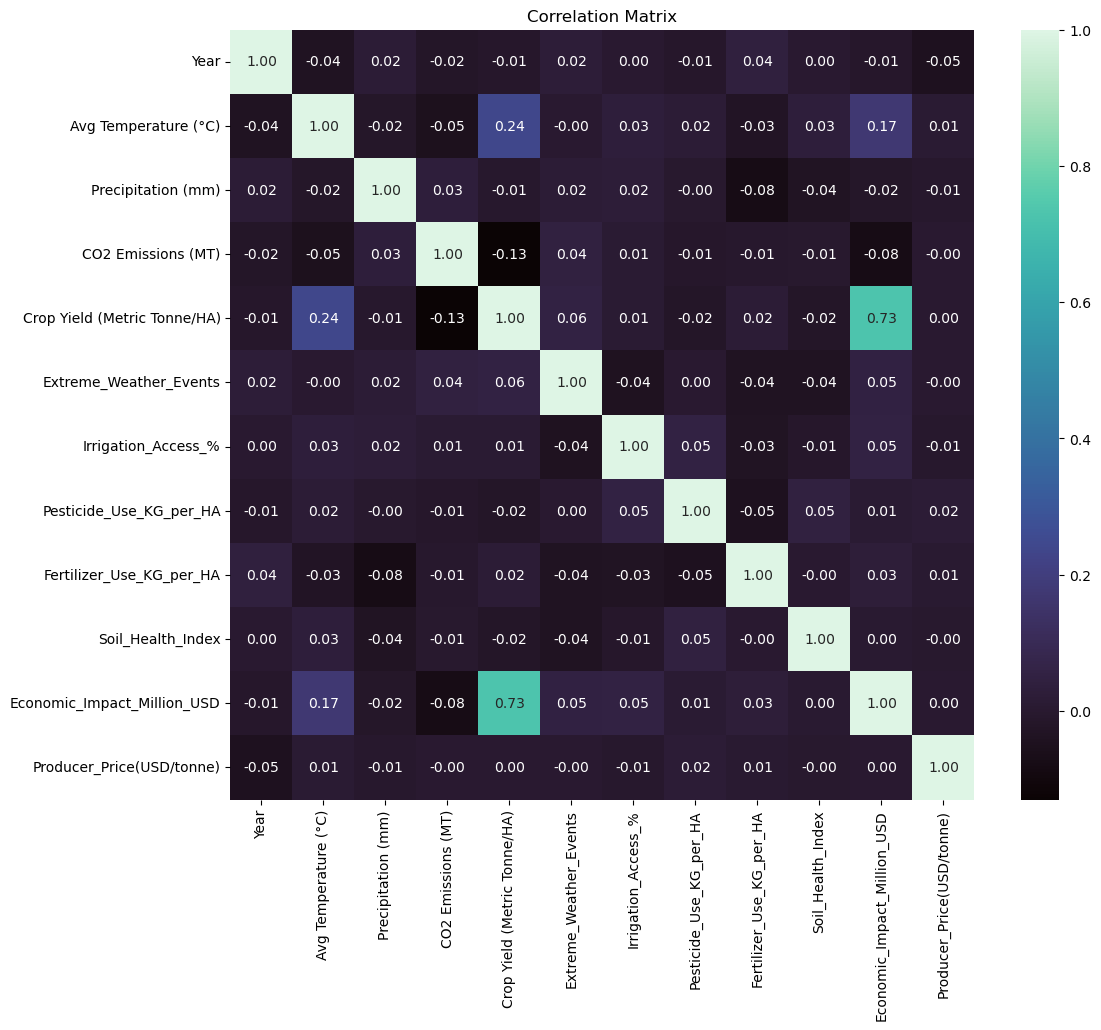

In [23]:

# Select only numerical columns for correlation analysis
numerical_cols = df_merged.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df_merged[numerical_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Predictive Modelling

In [57]:
dataset = df_merged[['Avg Temperature (°C)','Precipitation (mm)', 'CO2 Emissions (MT)','Economic_Impact_Million_USD']]
X = dataset.drop(['Economic_Impact_Million_USD'], axis=1) #Environmental factors
y = dataset['Economic_Impact_Million_USD']  # Target column

features = X.columns

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Regression

In [58]:
model_dt = DecisionTreeRegressor(random_state=42)

model_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = model_dt.predict(X_test)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.97


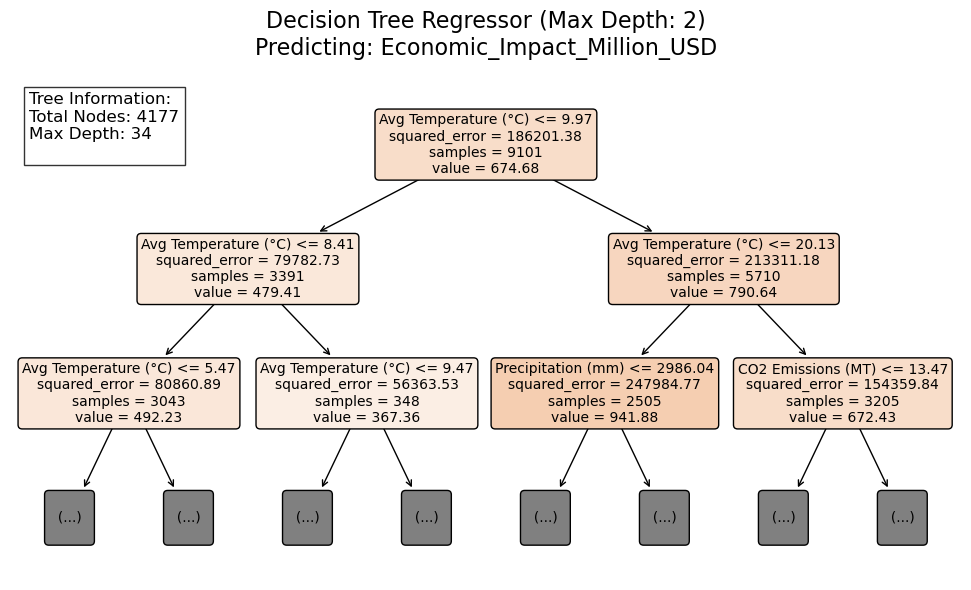

In [62]:
def visualize_decision_tree(model, feature_names=None, target_name=None, max_depth=None, figsize=(30,20)):

    # Create color map for node colors
    colors = [mcolors.to_rgb('lightblue'), mcolors.to_rgb('lightgreen')]
    cm = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=100)

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Plot the tree
    plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=max_depth,
        ax=ax,
        precision=2
    )

    # Add title and labels
    title = f"Decision Tree Regressor"
    if max_depth:
        title += f" (Max Depth: {max_depth})"
    if target_name:
        title += f"\nPredicting: {target_name}"

    plt.title(title, fontsize=16, pad=20)

    # Add tree information
    info_text = (
        f'Tree Information:\n'
        f'Total Nodes: {model.tree_.node_count}\n'
        f'Max Depth: {model.get_depth()}\n'
    )
    plt.text(0.02, 0.98, info_text,
             transform=ax.transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             fontsize=12)

    plt.tight_layout()
    return fig, ax

visualize_decision_tree(
        model_dt,
        feature_names=features,
        target_name='Economic_Impact_Million_USD',
        max_depth=2,
        figsize=(10, 6)
    )
plt.show()
     